**1. Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.naive_bayes import GaussianNB

**2. Filtering Data**

In [ ]:
pilih = ['country_name', 'year', 'v2x_freexp_altinf', 'v2x_frassoc_thick', 'v2x_suffr', 'v2xel_frefair', 'v2x_elecoff', 'v2x_polyarchy']
data = pd.read_csv('V-Dem-CY-Full+Others-v14.csv', usecols=pilih)
df = pd.DataFrame(data)
df.head()

,country_name,year,v2x_polyarchy,v2x_freexp_altinf,v2x_frassoc_thick,v2x_suffr,v2xel_frefair,v2x_elecoff
0,Mexico,1789,0.028,0.171,0.043,0.0,0.0,0.0
1,Mexico,1790,0.028,0.171,0.043,0.0,0.0,0.0
2,Mexico,1791,0.028,0.171,0.043,0.0,0.0,0.0
3,Mexico,1792,0.028,0.171,0.043,0.0,0.0,0.0
4,Mexico,1793,0.028,0.171,0.043,0.0,0.0,0.0


In [ ]:
asia = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan',  'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia',
        'Iran', 'Iraq', 'Israel',  'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia',  'Maldives', 'Mongolia', 'Burma/Myanmar',
        'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine',  'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka',
        'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan',  'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen']

df_filtered = df[df['country_name'].isin(asia)]

df_filtered = df_filtered[df_filtered['year'] > 1979]

df_filtered.head()

,country_name,year,v2x_polyarchy,v2x_freexp_altinf,v2x_frassoc_thick,v2x_suffr,v2xel_frefair,v2x_elecoff
1257,Japan,1980,0.841,0.924,0.899,1.0,0.920,1.0
1258,Japan,1981,0.841,0.924,0.899,1.0,0.920,1.0
1259,Japan,1982,0.841,0.924,0.899,1.0,0.920,1.0
1260,Japan,1983,0.841,0.924,0.899,1.0,0.920,1.0
1261,Japan,1984,0.842,0.924,0.902,1.0,0.918,1.0


**3. Handle Missing Values**

In [ ]:
print("Jumlah nilai NaN pada tiap kolom (Sebelum):\n")
df_filtered.isnull().sum()

Jumlah nilai NaN pada tiap kolom (Sebelum):



,0
country_name,0
year,0
v2x_polyarchy,2
v2x_freexp_altinf,0
v2x_frassoc_thick,0
v2x_suffr,0
v2xel_frefair,0
v2x_elecoff,2


In [ ]:
numerical_cols = df_filtered.select_dtypes(include=[np.number]).columns
df_filtered.loc[:, numerical_cols] = df_filtered[numerical_cols].fillna(df_filtered[numerical_cols].mean())

print("Jumlah nilai NaN pada tiap kolom (Sesudah):\n")
df_filtered.isnull().sum()

Jumlah nilai NaN pada tiap kolom (Sesudah):



,0
country_name,0
year,0
v2x_polyarchy,0
v2x_freexp_altinf,0
v2x_frassoc_thick,0
v2x_suffr,0
v2xel_frefair,0
v2x_elecoff,0


**4. Detect and Handle Outliers**

In [ ]:
df_numeric = df_filtered.select_dtypes(include=[np.number])
z_scores = np.abs(stats.zscore(df_numeric))
outliers = df_numeric[(z_scores > 3).any(axis=1)]

print("Jumlah outlier ada", outliers.shape[0], "dari", df_numeric.shape[0])

Jumlah outlier ada 152 dari 1988


In [ ]:
df_no_outliers = df_filtered[(z_scores <= 3).all(axis=1)]

print("Jumlah data setelah penghapusan outlier:", df_no_outliers.shape[0])

Jumlah data setelah penghapusan outlier: 1836


**5. Choosing Appropiate Variable (with Linear Regression)**

In [ ]:
data_vdem = df_no_outliers.copy()
data_vdem['kategori_keterlaksanaan'] = None;

X = data_vdem[['v2x_freexp_altinf', 'v2x_frassoc_thick', 'v2x_suffr', 'v2xel_frefair', 'v2x_elecoff']]
y = data_vdem['v2x_polyarchy']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=0)

In [ ]:
pf = PolynomialFeatures(degree=3)
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.transform(X_test)
lr = LinearRegression()
lr.fit(X_train_poly, y_train)
y_pred = lr.predict(X_test_poly)

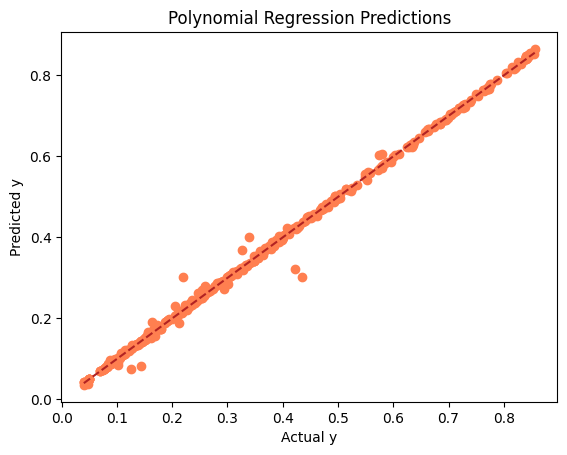

In [ ]:
plt.scatter(y_test, y_pred, color='coral')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='firebrick', linestyle='--')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Polynomial Regression Predictions')
plt.show()

In [ ]:
mae_lr = mean_absolute_error(y_test, y_pred)
mape_lr = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2_lr = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE) Polynomial Regression:", mae_lr)
print("Mean Absolute Percentage Error (MAPE) Polynomial Regression:", mape_lr)
print("R-squared (R2) Polynomial Regression:", r2_lr)

Mean Absolute Error (MAE) Polynomial Regression: 0.004415916997291469
Mean Absolute Percentage Error (MAPE) Polynomial Regression: 1.8916364102913628
R-squared (R2) Polynomial Regression: 0.9976872678053545


**6. Electoral Democracy Indices Binning**

In [ ]:
data_bin = data_vdem.copy()
bin = [0, 0.4, 0.6, 0.8, 1]
label = ['Rezim Otoritarian', 'Rezim Hibrida', 'Demokrasi Tidak Sempurna', 'Demokrasi Penuh']

data_bin['kategori_keterlaksanaan'] = pd.cut(data_bin['v2x_polyarchy'], bins=bin, labels=label, include_lowest=True)
data_bin.head()

,country_name,year,v2x_polyarchy,v2x_freexp_altinf,v2x_frassoc_thick,v2x_suffr,v2xel_frefair,v2x_elecoff,kategori_keterlaksanaan
1257,Japan,1980,0.841,0.924,0.899,1.0,0.920,1.0,Demokrasi Penuh
1258,Japan,1981,0.841,0.924,0.899,1.0,0.920,1.0,Demokrasi Penuh
1259,Japan,1982,0.841,0.924,0.899,1.0,0.920,1.0,Demokrasi Penuh
1260,Japan,1983,0.841,0.924,0.899,1.0,0.920,1.0,Demokrasi Penuh
1261,Japan,1984,0.842,0.924,0.902,1.0,0.918,1.0,Demokrasi Penuh


**7. Predictor Variable Analysis**

In [ ]:
pred_var = ['v2x_freexp_altinf', 'v2x_frassoc_thick', 'v2x_suffr', 'v2xel_frefair', 'v2x_elecoff']

data_bin[pred_var].describe()

,v2x_freexp_altinf,v2x_frassoc_thick,v2x_suffr,v2xel_frefair,v2x_elecoff
count,1836.000000,1836.000000,1836.000000,1836.000000,1836.000000
mean,0.441813,0.435558,0.974606,0.373273,0.691721
std,0.316089,0.319125,0.119515,0.296590,0.441088
min,0.012000,0.021000,0.160000,0.000000,0.000000
25%,0.129500,0.069000,1.000000,0.129000,0.000000
50%,0.430000,0.498000,1.000000,0.305000,1.000000
75%,0.732250,0.742250,1.000000,0.632000,1.000000
max,0.958000,0.931000,1.000000,0.961000,1.000000


In [ ]:
data_bin[pred_var].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1836 entries, 1257 to 25900
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   v2x_freexp_altinf  1836 non-null   float64
 1   v2x_frassoc_thick  1836 non-null   float64
 2   v2x_suffr          1836 non-null   float64
 3   v2xel_frefair      1836 non-null   float64
 4   v2x_elecoff        1836 non-null   float64
dtypes: float64(5)
memory usage: 86.1 KB


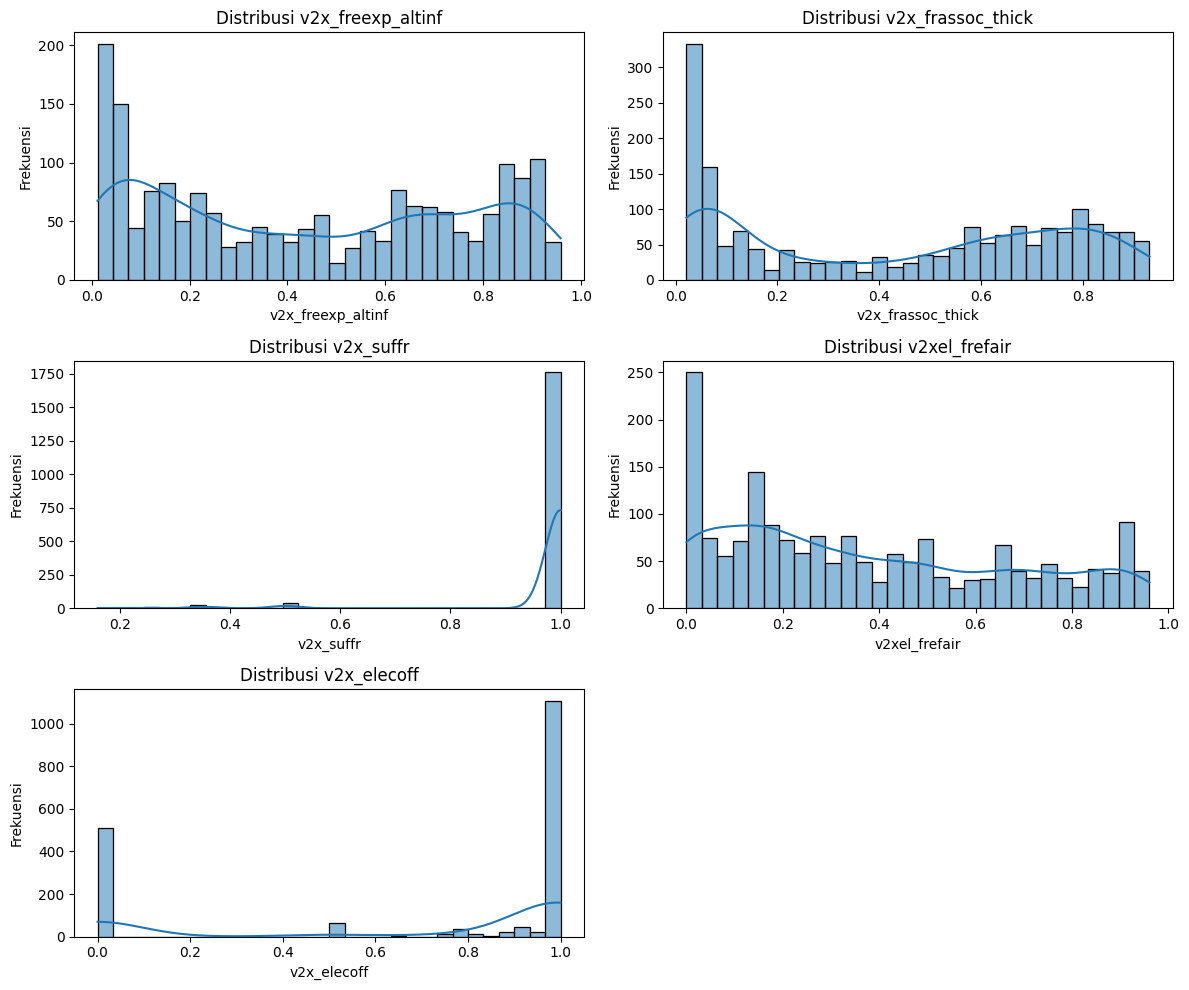

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()
for i, var in enumerate(pred_var):
    sns.histplot(data_bin[var], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribusi {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frekuensi')
if len(pred_var) < len(axes):
    for j in range(len(pred_var), len(axes)):
        axes[j].axis('off')
plt.tight_layout()
plt.show()

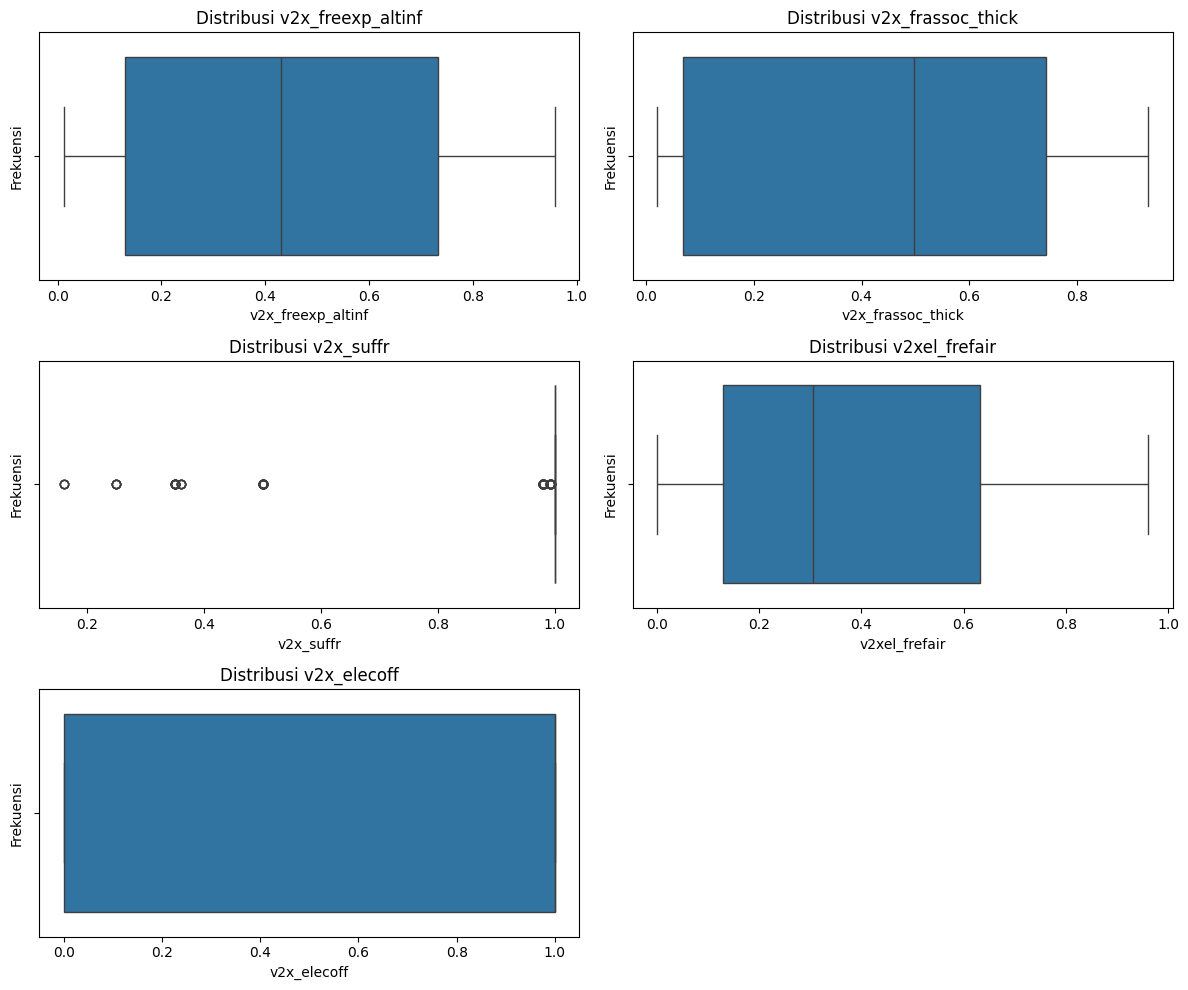

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()
for i, var in enumerate(pred_var):
    sns.boxplot(x=data_bin[var], ax=axes[i])
    axes[i].set_title(f'Distribusi {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frekuensi')
if len(pred_var) < len(axes):
    for j in range(len(pred_var), len(axes)):
        axes[j].axis('off')
plt.tight_layout()
plt.show()

**8. Target Variable Analysis**

In [ ]:
print(data_bin['kategori_keterlaksanaan'].value_counts())

kategori_keterlaksanaan
Rezim Otoritarian           1240
Rezim Hibrida                261
Demokrasi Tidak Sempurna     240
Demokrasi Penuh               95
Name: count, dtype: int64


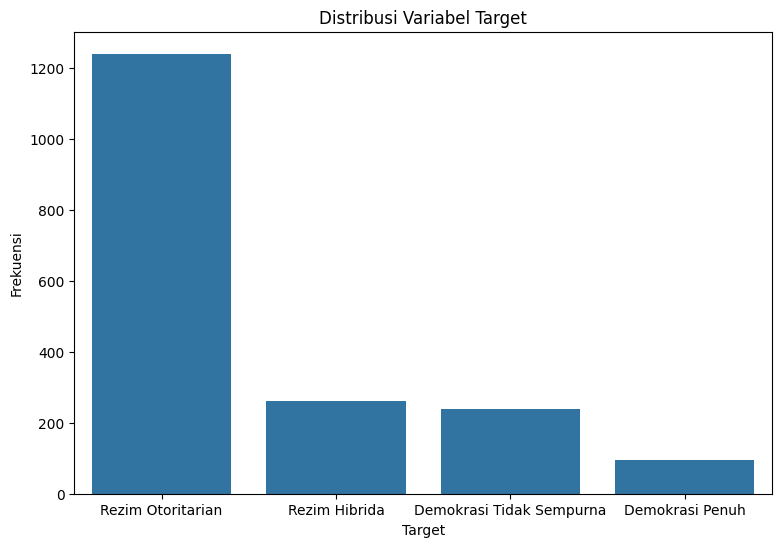

In [ ]:
plt.figure(figsize=(9, 6))
sns.countplot(x='kategori_keterlaksanaan', data=data_bin)
plt.title('Distribusi Variabel Target')
plt.xlabel('Target')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
print(data_bin['kategori_keterlaksanaan'].value_counts(normalize=True))

kategori_keterlaksanaan
Rezim Otoritarian           0.675381
Rezim Hibrida               0.142157
Demokrasi Tidak Sempurna    0.130719
Demokrasi Penuh             0.051743
Name: proportion, dtype: float64


**9. Indonesia Electoral Democracy Indices Trend Visualization**

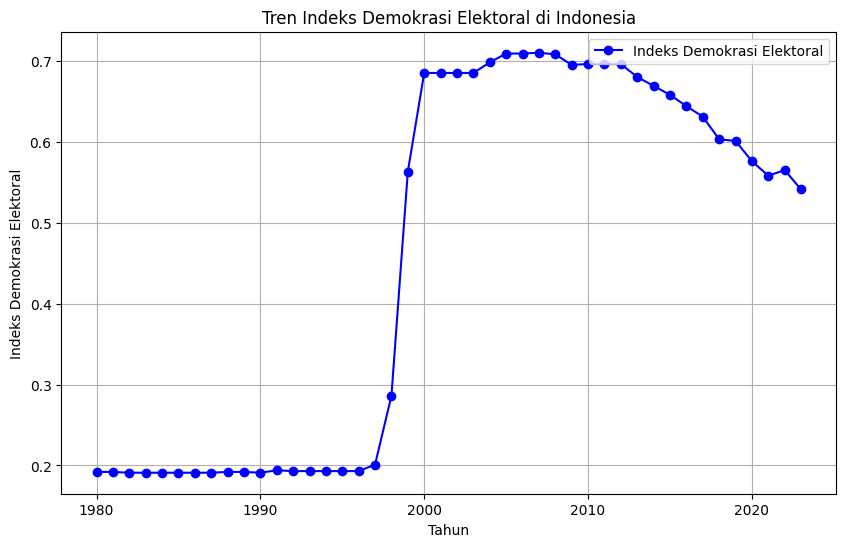

In [ ]:
data_indonesia = data_bin[data_bin['country_name'] == 'Indonesia']

plt.figure(figsize=(10, 6))
plt.plot(data_indonesia['year'], data_indonesia['v2x_polyarchy'], marker='o', color='b', label='Indeks Demokrasi Elektoral')
plt.title('Tren Indeks Demokrasi Elektoral di Indonesia')
plt.xlabel('Tahun')
plt.ylabel('Indeks Demokrasi Elektoral')
plt.grid(True)
plt.legend()
plt.show()

**10. South-East Asia Electoral Democracy Indices on 2023 Visualization**

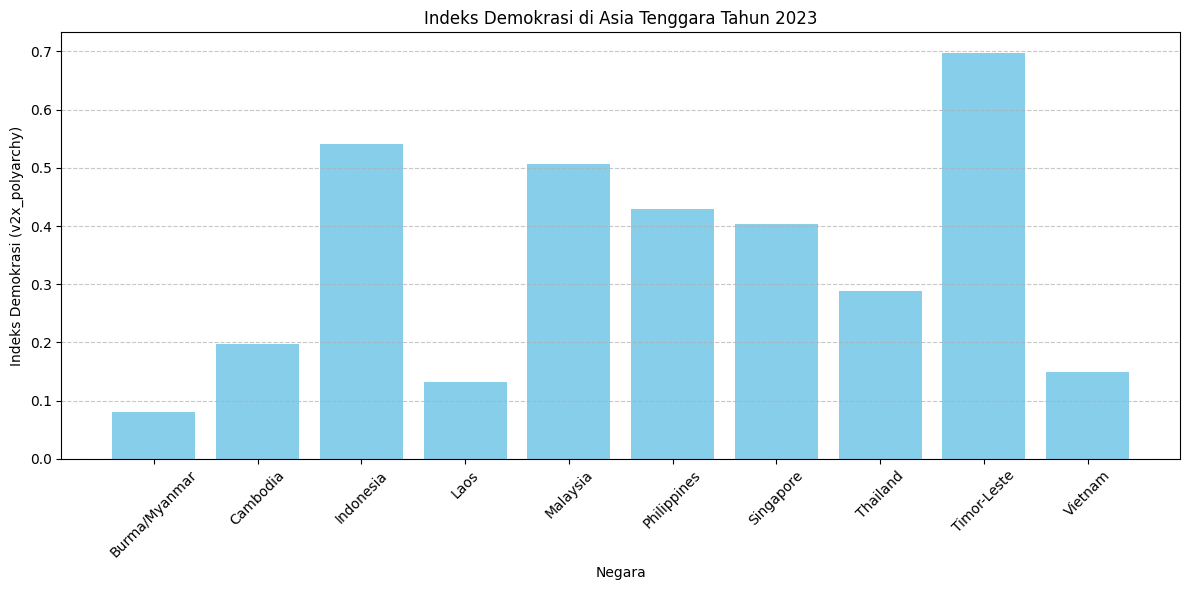

In [ ]:
data_vis_2 = data_bin.copy()

asean_countries = [
    'Indonesia', 'Malaysia', 'Singapore', 'Thailand',
    'Philippines', 'Vietnam', 'Cambodia',
    'Laos', 'Burma/Myanmar', 'Timor-Leste'
]

asean_2023 = data_vis_2[(data_vis_2['year'] == 2023) & (data_vis_2['country_name'].isin(asean_countries))]
asean_2023 = asean_2023.sort_values(by='country_name', ascending=True)
plt.figure(figsize=(12, 6))
plt.bar(asean_2023['country_name'], asean_2023['v2x_polyarchy'], color='skyblue')
plt.title('Indeks Demokrasi di Asia Tenggara Tahun 2023')
plt.xlabel('Negara')
plt.ylabel('Indeks Demokrasi (v2x_polyarchy)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**11. Predictor and Target Variable Correlcation Comparison with Scatter Plot**

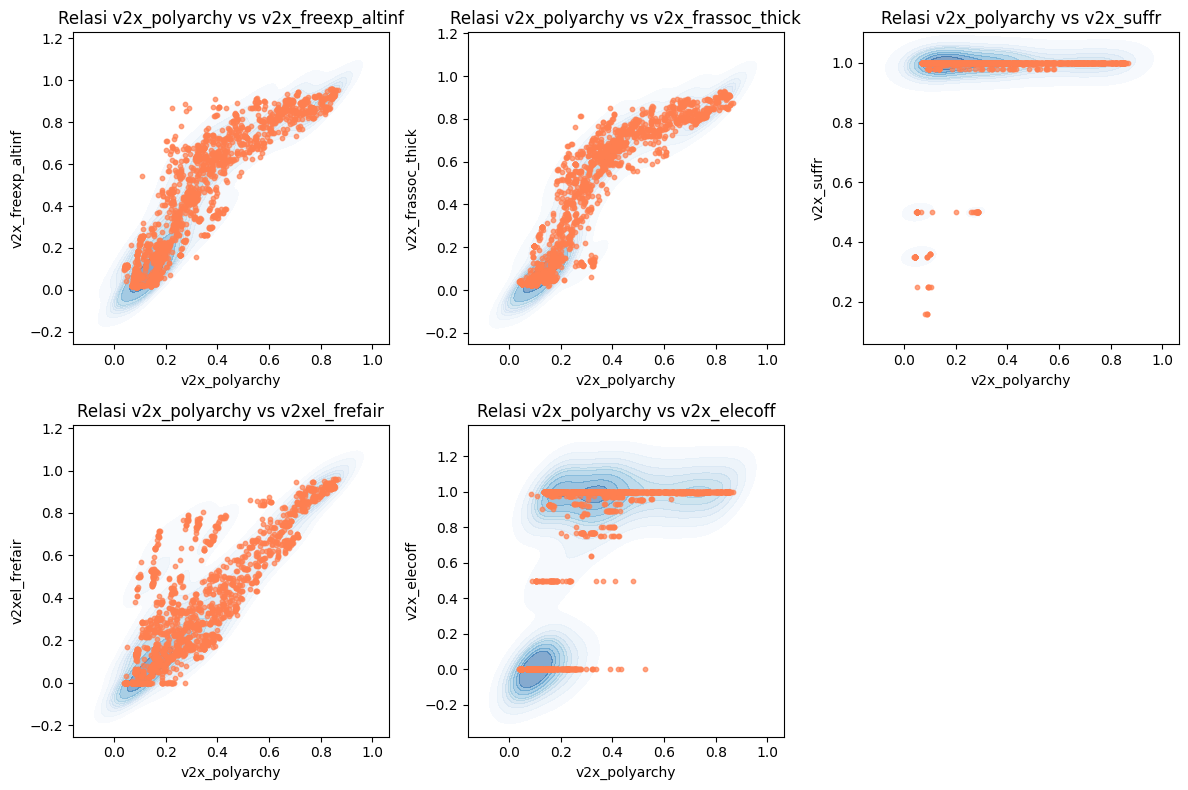

In [ ]:
plt.figure(figsize=(12, 8))

variables = [col for col in data_vis_2.columns if col not in ['v2x_polyarchy', 'country_name', 'kategori_keterlaksanaan', 'year']]

for i, var in enumerate(variables):
    plt.subplot(2, 3, i + 1)
    sns.kdeplot(
        x=data_vis_2['v2x_polyarchy'],
        y=data_vis_2[var],
        cmap='Blues',
        fill=True,
        alpha=0.5
    )
    plt.scatter(data_vis_2['v2x_polyarchy'], data_vis_2[var], alpha=0.7, color='coral', s=10)
    plt.title(f'Relasi v2x_polyarchy vs {var}')
    plt.xlabel('v2x_polyarchy')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

**12. Grouped Bar Chart of Predictor Variable for South-East Asia Country**

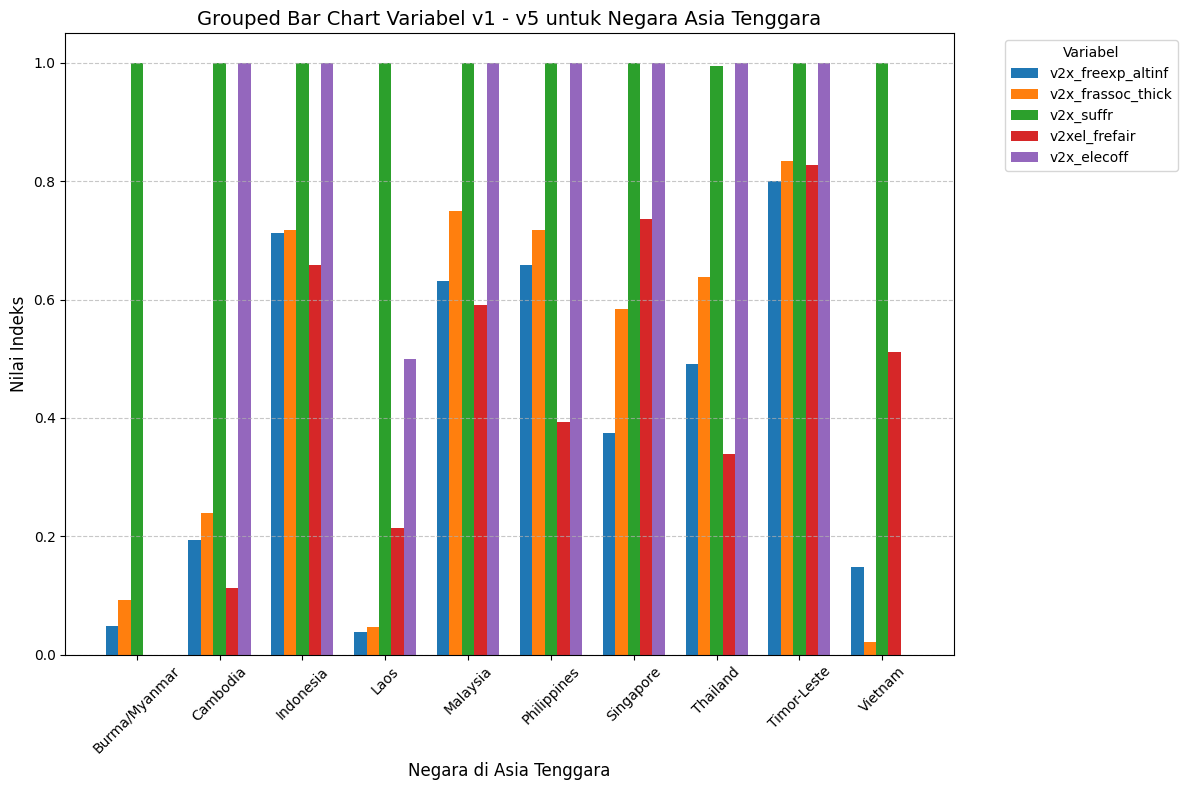

In [ ]:
plt.figure(figsize=(12, 8))
asean_countries = sorted([
    'Indonesia', 'Malaysia', 'Singapore', 'Thailand',
    'Philippines', 'Vietnam', 'Cambodia',
    'Laos', 'Burma/Myanmar', 'Timor-Leste'
])

filtered_data = data_vis_2[(data_vis_2['country_name'].isin(asean_countries)) & (data_vis_2['year'] == 2023)]

x = np.arange(len(asean_countries))
variables = ['v2x_freexp_altinf','v2x_frassoc_thick','v2x_suffr','v2xel_frefair','v2x_elecoff']
width = 0.15

for i, var in enumerate(variables):
    values = filtered_data.groupby('country_name')[var].mean().reindex(asean_countries).values
    plt.bar(x + i * width, values, width, label=var)

plt.xticks(x + width * 2, asean_countries, rotation=45, fontsize=10)
plt.xlabel('Negara di Asia Tenggara', fontsize=12)
plt.ylabel('Nilai Indeks', fontsize=12)
plt.title('Grouped Bar Chart Variabel v1 - v5 untuk Negara Asia Tenggara', fontsize=14)
plt.legend(
    variables,
    title='Variabel',
    fontsize=10,
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**13. Pie Chart**

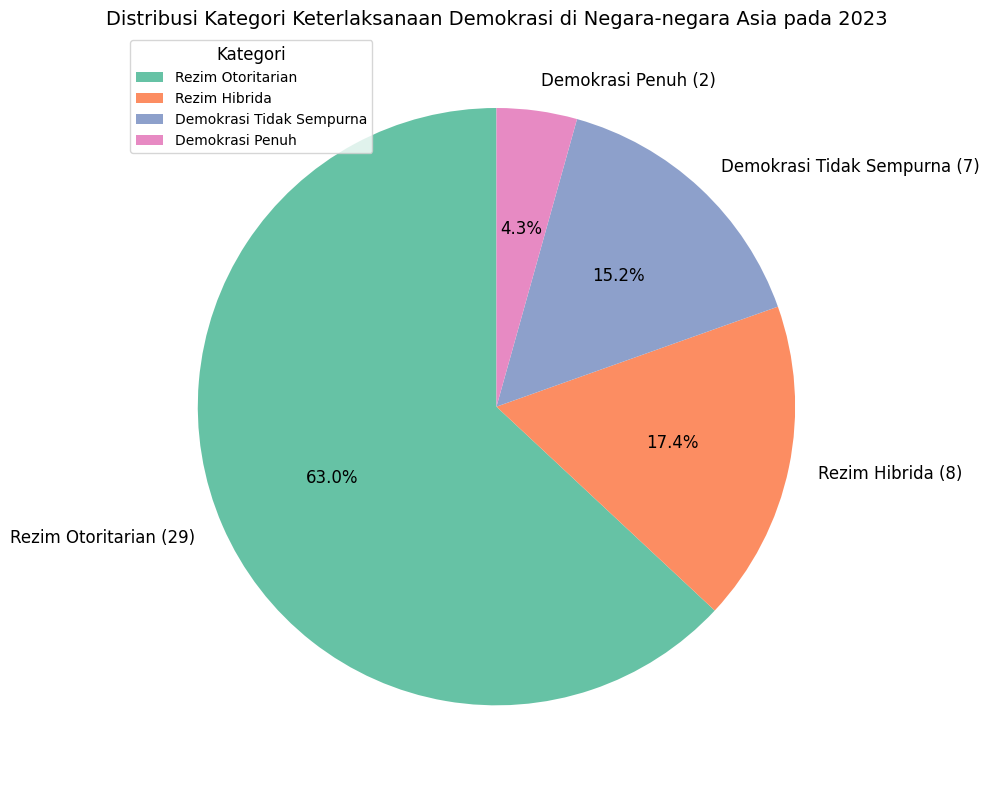

In [ ]:
data_2023 = data_bin[data_bin['year'] == 2023]
kategori_counts = data_2023['kategori_keterlaksanaan'].value_counts()

labels = [f"{kategori} ({count})" for kategori, count in zip(kategori_counts.index, kategori_counts.values)]
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

plt.figure(figsize=(10, 8))
plt.pie(
    kategori_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12}
)

plt.legend(
    kategori_counts.index,
    title="Kategori",
    loc="upper left",
    fontsize=10,
    title_fontsize=12
)

plt.title('Distribusi Kategori Keterlaksanaan Demokrasi di Negara-negara Asia pada 2023', fontsize=14)
plt.tight_layout()
plt.show()


NEW KNN

In [ ]:
data_klasifikasi = df_no_outliers.copy()

data_klasifikasi = data_klasifikasi.rename(columns={
    'v2x_freexp_altinf': 'v1',
    'v2x_frassoc_thick': 'v2',
    'v2x_suffr': 'v3',
    'v2xel_frefair': 'v4',
    'v2x_elecoff': 'v5',
    'v2x_polyarchy': 'v6'
})
X = data_klasifikasi[['v1', 'v2', 'v3', 'v4', 'v5']]
y = data_klasifikasi['v6']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0)

In [ ]:
data_klasifikasi.head(20)

,country_name,year,v6,v1,v2,v3,v4,v5
1257,Japan,1980,0.841,0.924,0.899,1.0,0.920,1.0
1258,Japan,1981,0.841,0.924,0.899,1.0,0.920,1.0
1259,Japan,1982,0.841,0.924,0.899,1.0,0.920,1.0
1260,Japan,1983,0.841,0.924,0.899,1.0,0.920,1.0
1261,Japan,1984,0.842,0.924,0.902,1.0,0.918,1.0
1262,Japan,1985,0.841,0.923,0.902,1.0,0.918,1.0
1263,Japan,1986,0.841,0.923,0.901,1.0,0.917,1.0
1264,Japan,1987,0.841,0.923,0.901,1.0,0.917,1.0
1265,Japan,1988,0.841,0.923,0.901,1.0,0.917,1.0
1266,Japan,1989,0.841,0.923,0.901,1.0,0.917,1.0


In [ ]:
bin = [0, 0.4, 0.6, 0.8, 1]
label = ['Rezim Otoritarian', 'Rezim Hibrida', 'Demokrasi Tidak Sempurna', 'Demokrasi Penuh']

data_klasifikasi['kategori_keterlaksanaan'] = pd.cut(data_klasifikasi['v6'], bins=bin, labels=label, include_lowest=True)
data_klasifikasi.head()

,country_name,year,v6,v1,v2,v3,v4,v5,kategori_keterlaksanaan
1257,Japan,1980,0.841,0.924,0.899,1.0,0.920,1.0,Demokrasi Penuh
1258,Japan,1981,0.841,0.924,0.899,1.0,0.920,1.0,Demokrasi Penuh
1259,Japan,1982,0.841,0.924,0.899,1.0,0.920,1.0,Demokrasi Penuh
1260,Japan,1983,0.841,0.924,0.899,1.0,0.920,1.0,Demokrasi Penuh
1261,Japan,1984,0.842,0.924,0.902,1.0,0.918,1.0,Demokrasi Penuh


## KNN

In [ ]:
data_bin.head()

,country_name,year,v2x_polyarchy,v2x_freexp_altinf,v2x_frassoc_thick,v2x_suffr,v2xel_frefair,v2x_elecoff,kategori_keterlaksanaan
1257,Japan,1980,0.841,0.924,0.899,1.0,0.920,1.0,Demokrasi Penuh
1258,Japan,1981,0.841,0.924,0.899,1.0,0.920,1.0,Demokrasi Penuh
1259,Japan,1982,0.841,0.924,0.899,1.0,0.920,1.0,Demokrasi Penuh
1260,Japan,1983,0.841,0.924,0.899,1.0,0.920,1.0,Demokrasi Penuh
1261,Japan,1984,0.842,0.924,0.902,1.0,0.918,1.0,Demokrasi Penuh


In [ ]:
bins = {
    "Rezim Otoritarian": 0,
    "Rezim Hibrida": 1,
    "Demokrasi Tidak Sempurna": 2,
    "Demokrasi Penuh": 3
}

In [ ]:
df_cop = data_klasifikasi.copy()

df_cop['kategori_keterlaksanaan_encoded'] = df_cop['kategori_keterlaksanaan'].map(bins)

In [ ]:

x = df_cop[['v1', 'v2', 'v3', 'v4', 'v5']]
y = df_cop['kategori_keterlaksanaan_encoded'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1)

In [ ]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(X_train)
x_test = sc_x.transform(X_test)

In [ ]:
models = {
    "knn" : KNeighborsClassifier(),
    "decision_tree" : DecisionTreeClassifier(),
    "svm" : SVC(),
    "random_forest" : RandomForestClassifier()
}

In [ ]:
ml_model = "knn"
model = models[ml_model]
model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))
print("Test set Accuracy: ", round(accuracy_score(y_test, predictions), 2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       377
           1       0.94      0.87      0.90        87
           2       0.93      0.92      0.93        61
           3       0.93      1.00      0.96        26

    accuracy                           0.97       551
   macro avg       0.95      0.95      0.95       551
weighted avg       0.97      0.97      0.97       551

Test set Accuracy:  0.97


[[375   2   0   0]
 [  7  76   4   0]
 [  0   3  56   2]
 [  0   0   0  26]]


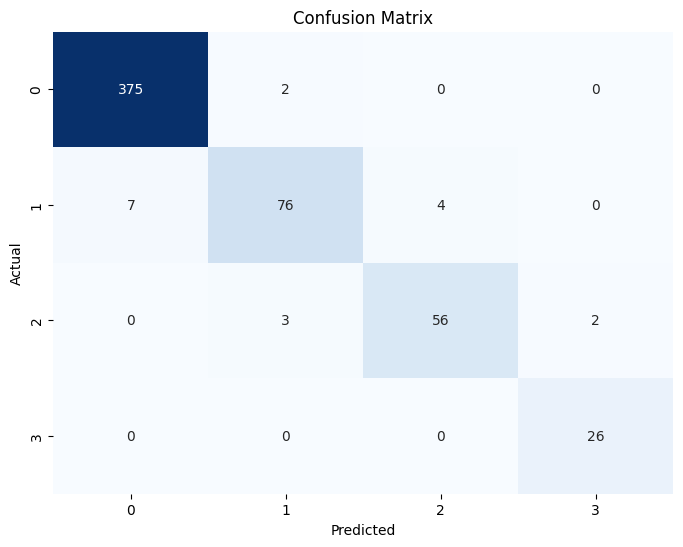

In [ ]:
conf_mat=confusion_matrix(y_test, predictions)
print(conf_mat)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print("Misclassification error rate:", round(np.mean(predictions!=y_test), 3))

Misclassification error rate: 0.033


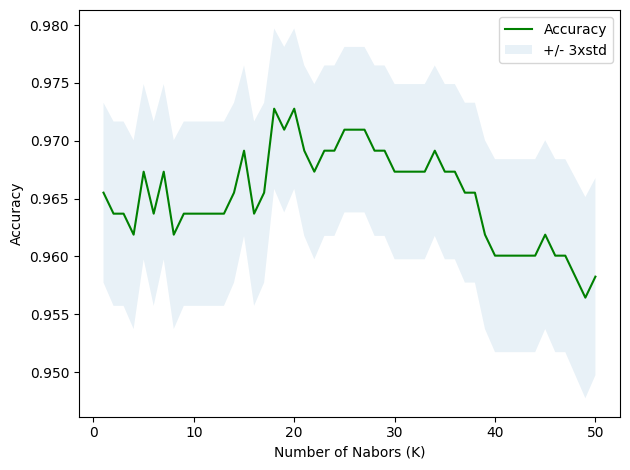

In [ ]:
from sklearn import metrics

mean_acc = np.zeros(50)
std_acc = np.zeros(50)
for n in range(1,51):
    knnmodel=KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train)
    y_pred=knnmodel.predict(x_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test, y_pred)
    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])

plt.plot(range(1,51),mean_acc,'g')
plt.fill_between(range(1,51),mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.1)
plt.legend(('Accuracy', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

Berdasarkan grafik tersebut didapati persebaran akurasi berdasarkan nilai K, yang dimana melalui pengamatan, dapat disimpulkan bahwa akurasi tertinggi berada pada nilai K = 18

In [ ]:
print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.9727767695099818 with k= 18


In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=18)
knn1.fit(x_train, y_train)
pred= knn1.predict(x_test)

In [ ]:
predictions = model.predict(x_test)
print(classification_report(y_test, pred))

print("Test set Accuracy:", round(accuracy_score(y_test, pred), 2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       377
           1       0.99      0.84      0.91        87
           2       0.92      1.00      0.96        61
           3       1.00      1.00      1.00        26

    accuracy                           0.97       551
   macro avg       0.97      0.96      0.96       551
weighted avg       0.97      0.97      0.97       551

Test set Accuracy: 0.97


In [ ]:
print("Misclassification error rate:", round(np.mean(pred!=y_test), 3))

Misclassification error rate: 0.027


[[375   2   0   0]
 [  7  76   4   0]
 [  0   3  56   2]
 [  0   0   0  26]]


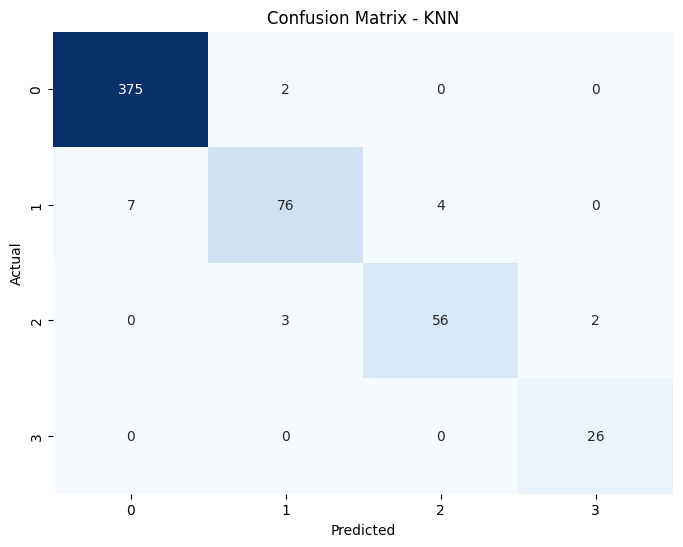

In [ ]:
conf_mat=confusion_matrix(y_test, predictions)
print(conf_mat)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

Berdasarkan confusion matrix tersebut, didapati hasil bahwa pada kelas dominan (kelas 0), model memiliki perform yang tergolong sangat baik karena 328 instance telah diprediksi benar dan hanya 4 instance yang diprediksi salah(sebagai kelas 1).

Kemudian, pada kelas minoritas sendiri (kelas 1,2,3), didapati bahwa terdapat perbandingan prediksi benar dan prediksi salah sebagai berikut:
- Pada kelas 1, terdapat 2 instance yang diprediksi salah dan 47 instance yang diprediksi sebagai benar  
- Pada kelas 2, terdapat 2 instance yang diprediksi salah dan dan 44 instance yang diprediksi benar
- Pada kelas 3, terdapat 1 instance yang diprediksi salah dan 19 instance yang diprediksi benar

Melalui perbandingan tersebut, dapat disimpulkan bahwa performa KNN sudah tergolong cukup baik untuk seluruh kelas.Lalu, berdasarkan jumlah prediksi benarnya, dapat diidentifikasi pula eksistensi imbalance pada kelas 0 yang memiliki lebih banyak data dari kelas lain.

Oleh karena itu, dapat disimpulkan bahwa model KNN sudah menunjukkan akurasi yang tinggi, khususnya pada kelas dominan.

## Decision Tree

In [ ]:
ml_model = "decision_tree"

model = models[ml_model]
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))

print("Test set Accuracy: ", round(accuracy_score(y_test, predictions),2))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       377
           1       0.94      0.84      0.88        87
           2       0.92      0.95      0.94        61
           3       1.00      1.00      1.00        26

    accuracy                           0.96       551
   macro avg       0.96      0.94      0.95       551
weighted avg       0.96      0.96      0.96       551

Test set Accuracy:  0.96


[[373   4   0   0]
 [  9  73   5   0]
 [  2   1  58   0]
 [  0   0   0  26]]


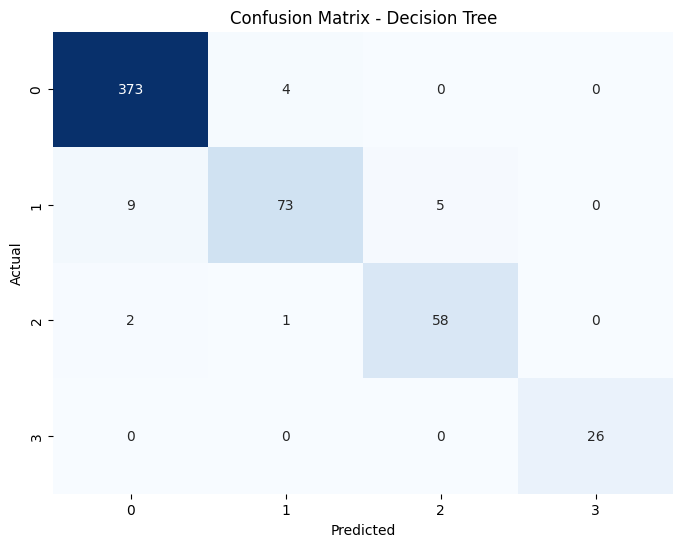

In [ ]:
conf_mat=confusion_matrix(y_test, predictions)
print(conf_mat)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

Berdasarkan confusion matrix tersebut, didapati hasil bahwa pada kelas dominan (kelas 0), model memiliki perform yang tergolong sangat baik karena 324 instance telah diprediksi benar dan hanya 5 instance yang diprediksi salah(sebagai kelas 1) wdalam kelas ini.

Kemudian, pada kelas minoritas sendiri (kelas 1,2,3), didapati bahwa terdapat perbandingan prediksi benar dan prediksi salah sebagai berikut:
- Pada kelas 1, terdapat 6 instance yang diprediksi salah (kelas 0) dan 46 instance yang diprediksi benar (kelas 1)
- Pada kelas 2, terdapat 2 instance yang diprediksi salah (kelas 1) dan dan 44 instance yang diprediksi benar (kelas 2)
- Pada kelas 3, terdapat 1 instance yang diprediksi salah (kelas 2) dan 19 instance yang diprediksi benar (kelas 3)

Selain itu, melalui perbandingan akurasi prediksi, dapat disimpulkan bahwa performadecision tree juga sudah tergolong cukup baik dengan kondisi bahwa hanya terdapat sedikit kesalahan prediksi, akurasi yang tinggi, sesnitivitas yang cukup tinggi, dan keseimbangan akurasi prediksi di setiap kelasnya.

Oleh karena itu, dapat disimpulkan bahwa model decision tree sudah menunjukkan akurasi yang tinggi.

## SVM

In [ ]:
ml_model = "svm"

model = models[ml_model]
model.fit(x_train, y_train)

SVC()

In [ ]:
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))

print("Test set Accuracy: ", round(accuracy_score(y_test,predictions),2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       377
           1       0.96      0.85      0.90        87
           2       0.98      0.95      0.97        61
           3       0.96      1.00      0.98        26

    accuracy                           0.97       551
   macro avg       0.97      0.95      0.96       551
weighted avg       0.97      0.97      0.97       551

Test set Accuracy:  0.97


[[376   1   0   0]
 [ 12  74   1   0]
 [  0   2  58   1]
 [  0   0   0  26]]


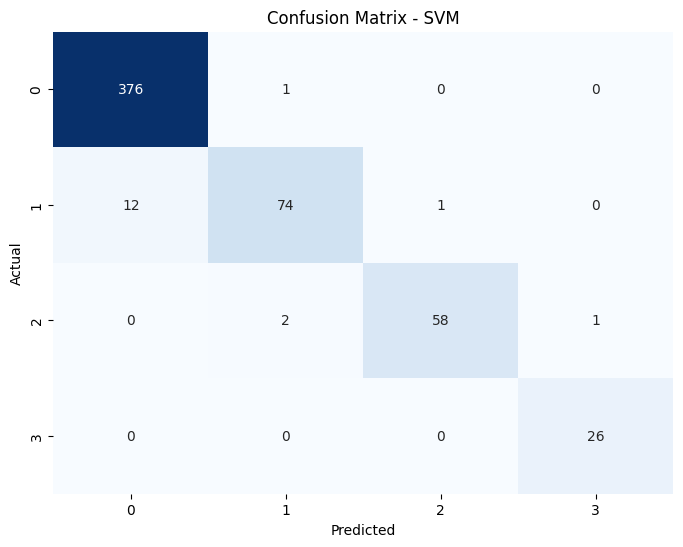

In [ ]:
conf_mat=confusion_matrix(y_test,predictions)
print(conf_mat)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

Berdasarkan confusion matrix tersebut, didapati hasil bahwa pada kelas dominan (kelas 0), model memiliki perform yang tergolong sangat baik karena 330 instance telah diprediksi benar dan hanya 12 instance yang diprediksi salah(sebagai kelas 1).

Kemudian, pada kelas minoritas sendiri (kelas 1,2,3), didapati bahwa terdapat perbandingan prediksi benar dan prediksi salah sebagai berikut:
- Pada kelas 1, terdapat 1 instance yang diprediksi sebagai kelas 0 dan 2 instance diprediksi salah sebagai kelas 2 beserta 74 instance yang diprediksi benar.
- Pada kelas 2, terdapat 1 instance yang diprediksi salah kelas 1 dan 58 instance yang diprediksi benar.
- Pada kelas 3, terdapat 1 instance yang diprediksi salah sebagai kelas 2 dan 26 instance yang diprediksi benar.

Melalui perbandingan antara berbagai komponen yang sudah tertera, didapati bahwa tidak terdapat kesalahan klasifikasi yang cukup signifikan di tiap kelas.

Kemudian, berdasarkan hasil tes akurasinya, didapati bahwa terdapat akurasi yang tinggi, sensitivitas yang cukup tinggi, keseimbangan akurasi prediksi yang tinggi di setiap kelasnya. Akan tetapi, masih terdapat kesenjangan antara nilai dari tiap kategori tersebut.

Oleh karena itu, dapat disimpulkan bahwa model Support Vector Machine (SVM) masih menunjukkan akurasi yang sedang.

## Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

rf_predictions = rf_model.predict(x_test)

print(classification_report(y_test, rf_predictions))
print("Test set Accuracy: ", round(accuracy_score(y_test, rf_predictions), 2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       377
           1       0.93      0.87      0.90        87
           2       0.93      0.92      0.93        61
           3       0.96      1.00      0.98        26

    accuracy                           0.97       551
   macro avg       0.95      0.95      0.95       551
weighted avg       0.97      0.97      0.97       551

Test set Accuracy:  0.97


In [ ]:
print("Misclassification error rate:", round(np.mean(rf_predictions != y_test), 3))

Misclassification error rate: 0.033


In [ ]:
conf_mat = confusion_matrix(y_test, rf_predictions)
print(conf_mat)

[[375   2   0   0]
 [  7  76   4   0]
 [  0   4  56   1]
 [  0   0   0  26]]


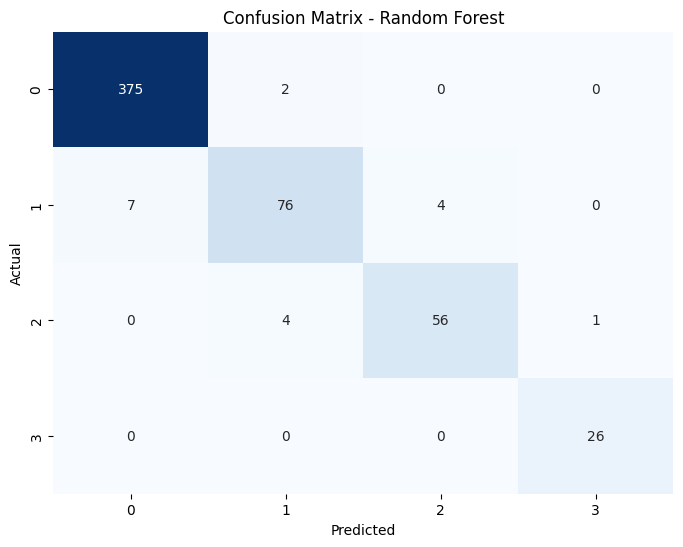

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

Berdasarkan confusion matrix tersebut, didapati hasil bahwa pada kelas dominan (kelas 0), model memiliki perform yang tergolong sangat baik karena 375 instance telah diprediksi benar dan hanya 7 instance yang diprediksi salah(sebagai kelas 1).

Kemudian, pada kelas minoritas sendiri (kelas 1,2,3), didapati bahwa terdapat perbandingan prediksi benar dan prediksi salah sebagai berikut:
- Pada kelas 1, terdapat 2 instance yang diprediksi salah sebagai kelas 0 dan 4 instance yang diprediksi salah sebagai kelas 2 sedangkan di sisi lain, 76 instance yang diprediksi benar.
- Pada kelas 2, terdapat 4 instance yang diprediksi salah sebagai kelas 1 dan 56 instance yang diprediksi benar.
- Pada kelas 3, terdapat 1 instance yang diprediksi salah sebagai kelas 2 dan 26 instance yang diprediksi benar.

Melalui perbandingan antara berbagai komponen yang sudah tertera, didapati bahwa tidak terdapat kesalahan klasifikasi yang cukup berarti.

Kemudian, berdasarkan hasil tes akurasinya, didapati bahwa terdapat akurasi yang tinggi, sensitivitas yang cukup tinggi, keseimbangan akurasi prediksi yang tinggi di setiap kelasnya. Akan tetapi, masih terdapat kesenjangan antara nilai dari tiap kategori tersebut.

Oleh karena itu, dapat disimpulkan bahwa model Random Forest masih menunjukkan sudah menunjukkan akurasi yang cukup tinggi.

Untuk menyimpulkan metode klasifikasi terbaik yang dapat digunakan maka kita harus memperhatikan dari kategori akurasi, sensitivitas, dan keseimbangan prediksi di tiap kelas. Jika menelisik khusus pada metode decision tree, maka didapati bahwa akurasi dan keseimbangan dari nilai pada tiap kategori sudah tidak berbeda jauh, tetapi masih lebih rendah dibandingkan KNN. Kemudian, setelah memperhatikan hasil tes akurasi metode SVM, masih terdapat masalah dari segi kesenjangan nilai, terkhusus pada akurasi sensitivitas. Lalu, untuk hasil  akurasi pada metode KNN sendiri, didapati bahwa nilai akurasi tiap kategori juga tergolong tinggi, tidak ada kesenjangan pada tiap kategori, serta tidak kesalahan deteksi instance untuk tiap kelas juga tergolong kecil.

Melalui perbandingan tersebut, dapat disimpulkan bahwa metode klasifikasi terbaik untuk memprediksi klasifikasi kelas pada kasus indeks demokrasi elektoral negara di benua Asia yang dipengaruhi oleh 5 variabel independen adalah Metode K-Nearest Neighbor (KNN).

## TIME SERIES

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
!pip install sktime

from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.datasets import load_arrow_head


from sktime.classification.distance_based import ProximityForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sktime.datasets import load_arrow_head


In [ ]:
X, y = load_arrow_head(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tsf = TimeSeriesForestClassifier(n_estimators=100, random_state=42)

tsf.fit(X_train, y_train)
y_pred = tsf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nSample Predictions:")
for i in range(5):
    print(f"True label: {y_test[i]}, Predicted label: {y_pred[i]}")

Accuracy: 0.84

Sample Predictions:
True label: 0, Predicted label: 0
True label: 2, Predicted label: 2
True label: 1, Predicted label: 1
True label: 0, Predicted label: 0
True label: 0, Predicted label: 0


#Oversampling

In [ ]:
x = data_bin[['v2x_freexp_altinf', 'v2x_frassoc_thick', 'v2x_suffr', 'v2xel_frefair', 'v2x_elecoff']]
y = data_bin['kategori_keterlaksanaan'].values

x

y

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=1)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Distribusi target sebelum oversampling:")
print(pd.Series(y_train).value_counts())
print("\nDistribusi target setelah oversampling:")
print(pd.Series(y_train_resampled).value_counts())

Distribusi target sebelum oversampling:
Rezim Otoritarian           863
Demokrasi Tidak Sempurna    179
Rezim Hibrida               174
Demokrasi Penuh              69
Name: count, dtype: int64

Distribusi target setelah oversampling:
Rezim Otoritarian           863
Demokrasi Penuh             863
Rezim Hibrida               863
Demokrasi Tidak Sempurna    863
Name: count, dtype: int64


## OverSampling KNN

In [ ]:
ml_model = "knn"
model = models[ml_model]
model.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [ ]:
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

print("Test set Accuracy: ", round(accuracy_score(y_test, predictions), 2))

                          precision    recall  f1-score   support

         Demokrasi Penuh       0.93      1.00      0.96        26
Demokrasi Tidak Sempurna       0.92      0.95      0.94        61
           Rezim Hibrida       0.92      0.91      0.91        87
       Rezim Otoritarian       0.99      0.98      0.99       377

                accuracy                           0.97       551
               macro avg       0.94      0.96      0.95       551
            weighted avg       0.97      0.97      0.97       551

Test set Accuracy:  0.97


[[ 26   0   0   0]
 [  2  58   1   0]
 [  0   5  79   3]
 [  0   0   6 371]]


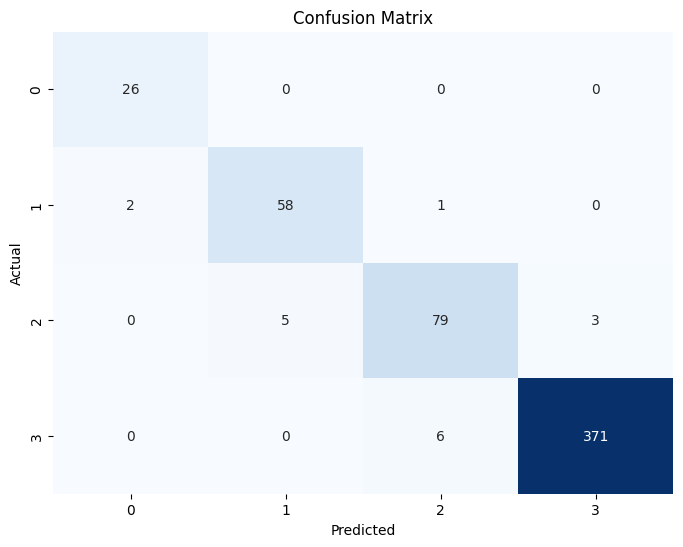

In [ ]:
conf_mat=confusion_matrix(y_test, predictions)
print(conf_mat)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print("Misclassification error rate:", round(np.mean(predictions!=y_test), 3))

Misclassification error rate: 0.031


In [ ]:
data_bin.tail(10)

,country_name,year,v2x_polyarchy,v2x_freexp_altinf,v2x_frassoc_thick,v2x_suffr,v2xel_frefair,v2x_elecoff,kategori_keterlaksanaan
25891,United Arab Emirates,2014,0.087,0.128,0.032,0.16,0.440,0.0,Rezim Otoritarian
25892,United Arab Emirates,2015,0.094,0.126,0.033,0.25,0.452,0.0,Rezim Otoritarian
25893,United Arab Emirates,2016,0.097,0.112,0.036,0.25,0.497,0.0,Rezim Otoritarian
25894,United Arab Emirates,2017,0.093,0.073,0.036,0.25,0.497,0.0,Rezim Otoritarian
25895,United Arab Emirates,2018,0.093,0.075,0.036,0.25,0.497,0.0,Rezim Otoritarian
25896,United Arab Emirates,2019,0.100,0.071,0.042,0.36,0.499,0.0,Rezim Otoritarian
25897,United Arab Emirates,2020,0.101,0.075,0.031,0.36,0.504,0.0,Rezim Otoritarian
25898,United Arab Emirates,2021,0.099,0.055,0.038,0.36,0.504,0.0,Rezim Otoritarian
25899,United Arab Emirates,2022,0.102,0.070,0.038,0.36,0.504,0.0,Rezim Otoritarian
25900,United Arab Emirates,2023,0.102,0.066,0.038,0.36,0.510,0.0,Rezim Otoritarian


## OverSampling Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=1)

In [ ]:
predictions = rf_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

print("Test set Accuracy: ", round(accuracy_score(y_test, predictions), 2))


Classification Report:
                          precision    recall  f1-score   support

         Demokrasi Penuh       0.96      1.00      0.98        26
Demokrasi Tidak Sempurna       0.95      0.92      0.93        61
           Rezim Hibrida       0.90      0.93      0.92        87
       Rezim Otoritarian       0.99      0.99      0.99       377

                accuracy                           0.97       551
               macro avg       0.95      0.96      0.95       551
            weighted avg       0.97      0.97      0.97       551

Test set Accuracy:  0.97


In [ ]:
conf_mat = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:")
print(conf_mat)


Confusion Matrix:
[[ 26   0   0   0]
 [  1  56   4   0]
 [  0   3  81   3]
 [  0   0   5 372]]


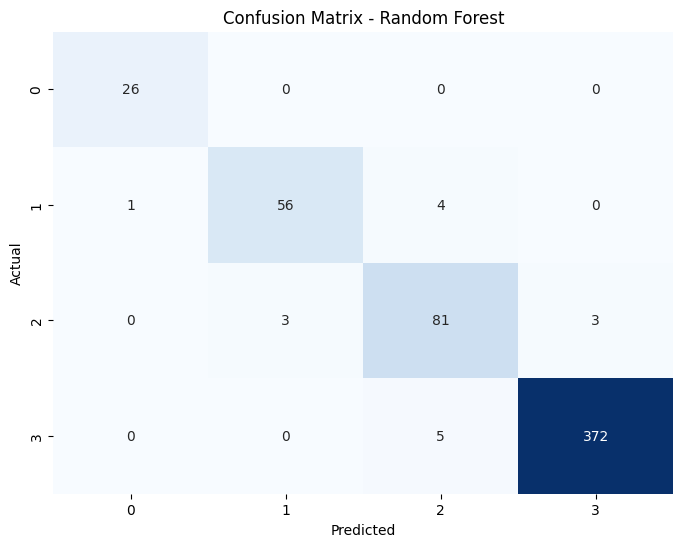

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [ ]:
print("Misclassification error rate:", round(np.mean(predictions != y_test), 3))

Misclassification error rate: 0.029


In [ ]:
input_data = [[0.842, 0.924, 0.42	, 0.440, 1.0]]


predicted_category = model.predict(input_data)

print(f"Kategori yang diprediksi: {predicted_category[0]}")

Kategori yang diprediksi: Rezim Hibrida


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
data_baru = data_vdem[['country_name', 'year', 'v2x_polyarchy']]
mergedata = data_baru.groupby(['country_name', 'year']).sum()
mergedata

v2x_polyarchy
country_name year               
Afghanistan  1980          0.082
             1981          0.083
             1982          0.082
             1983          0.083
             1984          0.083
...                          ...
Yemen        2019          0.119
             2020          0.115
             2021          0.117
             2022          0.125
             2023          0.130

[1836 rows x 1 columns]

In [ ]:
data_indonesia['year'] = pd.to_datetime(data_indonesia['year'], format='%Y')
data_for_smoothing = data_indonesia.set_index('year')['v2x_polyarchy']
data_for_smoothing.head()

<ipython-input-45-03875d00984d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_indonesia['year'] = pd.to_datetime(data_indonesia['year'], format='%Y')


,v2x_polyarchy
year,
1980-01-01,0.192
1981-01-01,0.192
1982-01-01,0.191
1983-01-01,0.191
1984-01-01,0.191


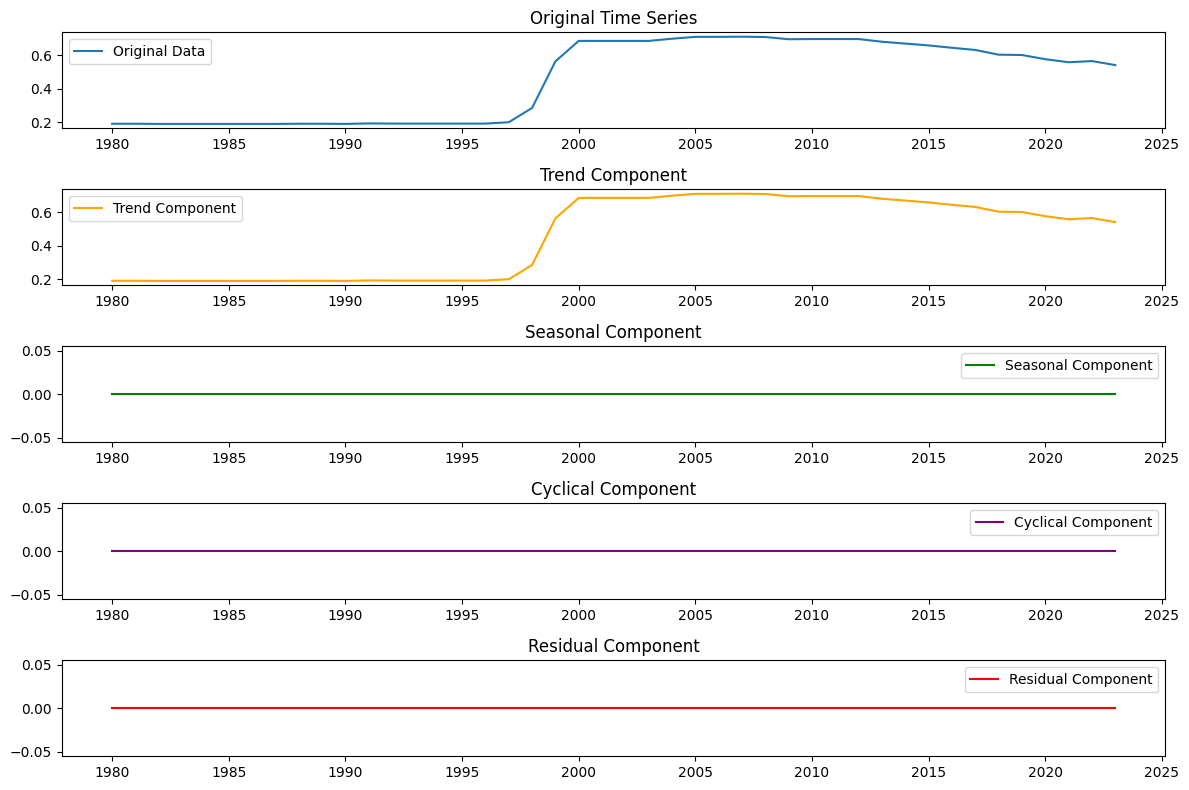

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data_for_smoothing, model='additive', extrapolate_trend='freq')
cyclical_component = decomposition.trend - decomposition.observed + decomposition.seasonal + decomposition.resid
plt.figure(figsize=(12, 8))

plt.subplot(5, 1, 1)
plt.plot(data_for_smoothing, label='Original Data')
plt.title('Original Time Series')
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(decomposition.trend, label='Trend Component', color='orange')
plt.title('Trend Component')
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal Component', color='green')
plt.title('Seasonal Component')
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(cyclical_component, label='Cyclical Component', color='purple')
plt.title('Cyclical Component')
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(decomposition.resid, label='Residual Component', color='red')
plt.title('Residual Component')
plt.legend()


plt.tight_layout()
plt.show()

<ipython-input-48-4c1954204ccd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_indonesia['year'] = pd.to_datetime(data_indonesia['year'], format='%Y')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._i

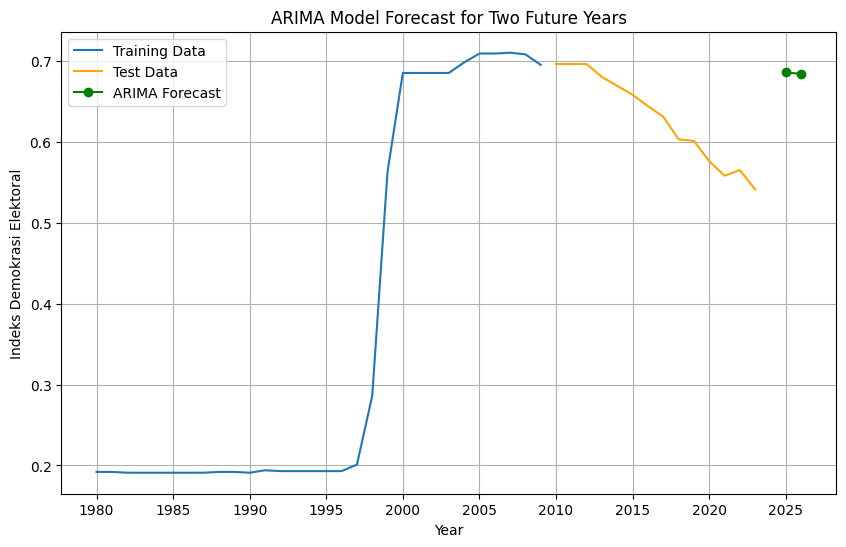

,v2x_polyarchy
year,
2024-12-31,0.685884
2025-12-31,0.683657


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
data_indonesia = data_vdem[data_vdem['country_name'] == 'Indonesia']


data_indonesia = data_vdem[data_vdem['country_name'] == 'Indonesia']


data_indonesia['year'] = pd.to_datetime(data_indonesia['year'], format='%Y')
data_for_smoothing = data_indonesia.set_index('year')['v2x_polyarchy']


train_len = 30
train = data_for_smoothing[:train_len]
test = data_for_smoothing[train_len:]


model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()


last_year = data_for_smoothing.index.max().year
forecast_years = pd.date_range(start=f"{last_year+1}", periods=2, freq='Y')
forecast = model_fit.forecast(steps=2)


forecast_df = pd.DataFrame({'year': forecast_years, 'v2x_polyarchy': forecast})
forecast_df.set_index('year', inplace=True)


full_data = pd.concat([data_for_smoothing, forecast_df])


plt.figure(figsize=(10, 6))
plt.plot(train.index, train.values, label='Training Data')
plt.plot(test.index, test.values, label='Test Data', color='orange')
plt.plot(forecast_df.index, forecast_df['v2x_polyarchy'], label='ARIMA Forecast', color='green', marker='o')
plt.title('ARIMA Model Forecast for Two Future Years')
plt.xlabel('Year')
plt.ylabel('Indeks Demokrasi Elektoral')
plt.legend()
plt.grid()
plt.show()


forecast_df

In [65]:
data_for_smoothing = test.copy()
data_for_smoothing = data_for_smoothing.reset_index()
data_for_smoothing['v2x_polyarchy'] = data_for_smoothing['year'].dt.year.mean()

In [ ]:
data_for_smoothing.head()

<ipython-input-51-d4f87dcc835a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_indonesia['year'] = pd.to_datetime(data_indonesia['year'], format='%Y')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._i

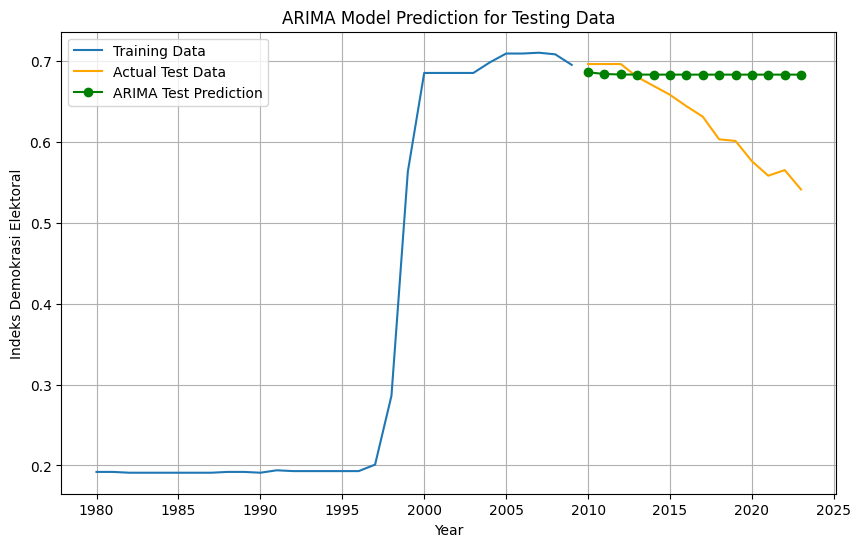

,v2x_polyarchy
year,
2010-01-01,0.685884
2011-01-01,0.683657
2012-01-01,0.683113
2013-01-01,0.682980
2014-01-01,0.682948
2015-01-01,0.682940
2016-01-01,0.682938
2017-01-01,0.682938
2018-01-01,0.682938


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt


data_indonesia = data_vdem[data_vdem['country_name'] == 'Indonesia']


data_indonesia['year'] = pd.to_datetime(data_indonesia['year'], format='%Y')
data_for_smoothing = data_indonesia.set_index('year')['v2x_polyarchy']


train_len = 30
train = data_for_smoothing[:train_len]
test = data_for_smoothing[train_len:]


model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()


test_forecast = model_fit.forecast(steps=len(test))


test_forecast_df = pd.DataFrame({'year': test.index, 'v2x_polyarchy': test_forecast})
test_forecast_df.set_index('year', inplace=True)


plt.figure(figsize=(10, 6))
plt.plot(train.index, train.values, label='Training Data')
plt.plot(test.index, test.values, label='Actual Test Data', color='orange')
plt.plot(test_forecast_df.index, test_forecast_df['v2x_polyarchy'], label='ARIMA Test Prediction', color='green', marker='o')
plt.title('ARIMA Model Prediction for Testing Data')
plt.xlabel('Year')
plt.ylabel('Indeks Demokrasi Elektoral')
plt.legend()
plt.grid()
plt.show()


test_forecast_df


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

forecast_values = forecast.values
min_len = min(len(test), len(forecast_values))
rmse = np.sqrt(mean_squared_error(test[:min_len], forecast_values[:min_len]))
mape = mean_absolute_percentage_error(test[:min_len], forecast_values[:min_len])
r2 = r2_score(test[:min_len], forecast_values[:min_len])

results = pd.DataFrame ({'Method': ['ARIMA METHOD'],
                         'RMSE':[rmse], 'MAPE': [mape], 'R-squared': [r2]})
results

,Method,RMSE,MAPE,R-squared
0,ARIMA METHOD,0.011285,0.016135,0.0


<ipython-input-53-0a989518b00e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_indonesia['year'] = pd.to_datetime(data_indonesia['year'], format='%Y')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
<ipython-input-53-0a989518b00e>:23: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_years = pd.date_range(start=f"{last_

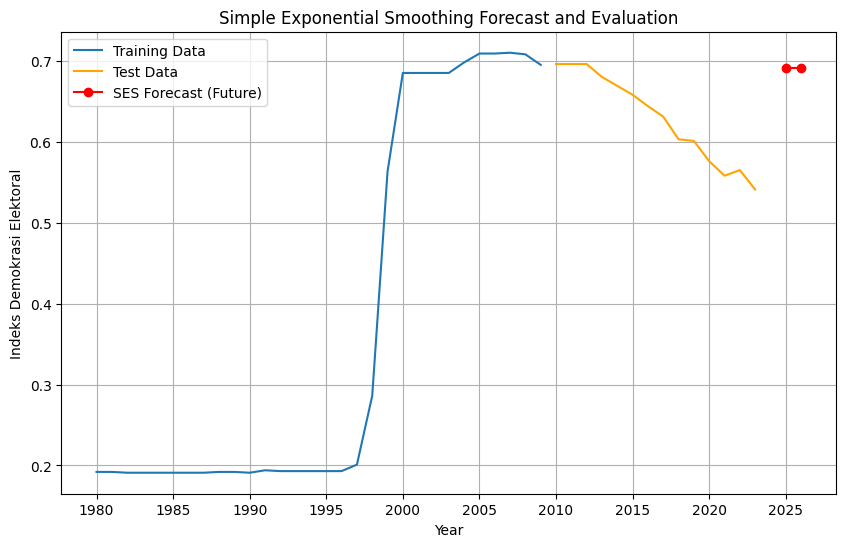

,v2x_polyarchy
year,
2024-12-31,0.69118
2025-12-31,0.69118


In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import matplotlib.pyplot as plt


data_indonesia = data_vdem[data_vdem['country_name'] == 'Indonesia']


data_indonesia['year'] = pd.to_datetime(data_indonesia['year'], format='%Y')
data_for_smoothing = data_indonesia.set_index('year')['v2x_polyarchy']


train_len = 30
train = data_for_smoothing[:train_len]
test = data_for_smoothing[train_len:]


model = SimpleExpSmoothing(train)
model_fit = model.fit(smoothing_level=0.3)

test_forecast = model_fit.forecast(steps=len(test))

last_year = data_for_smoothing.index.max().year
forecast_years = pd.date_range(start=f"{last_year+1}", periods=2, freq='Y')
future_forecast = model_fit.forecast(steps=2)


future_forecast_df = pd.DataFrame({'year': forecast_years, 'v2x_polyarchy': future_forecast})
future_forecast_df.set_index('year', inplace=True)


full_data = pd.concat([data_for_smoothing, future_forecast_df])


plt.figure(figsize=(10, 6))
plt.plot(train.index, train.values, label='Training Data')
plt.plot(test.index, test.values, label='Test Data', color='orange')
plt.plot(future_forecast_df.index, future_forecast_df['v2x_polyarchy'], label='SES Forecast (Future)', color='red', marker='o')
plt.title('Simple Exponential Smoothing Forecast and Evaluation')
plt.xlabel('Year')
plt.ylabel('Indeks Demokrasi Elektoral')
plt.legend()
plt.grid()
plt.show()


future_forecast_df

In [ ]:
mae = mean_absolute_error(test, test_forecast)
rmse = mean_squared_error(test, test_forecast, squared=False)
mape = mean_absolute_percentage_error(test, test_forecast)
r2 = r2_score(test[:min_len], forecast_values[:min_len])

results = pd.DataFrame ({'Method': ['Simple Exponential Smoothing'],
                         'RMSE':[rmse], 'MAPE': [mape], 'R-squared': [r2]})
results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Method,RMSE,MAPE,R-squared
0,Simple Exponential Smoothing,0.081513,0.108949,0.0


<ipython-input-55-f06af6940ec7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_indonesia['year'] = pd.to_datetime(data_indonesia['year'], format='%Y')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


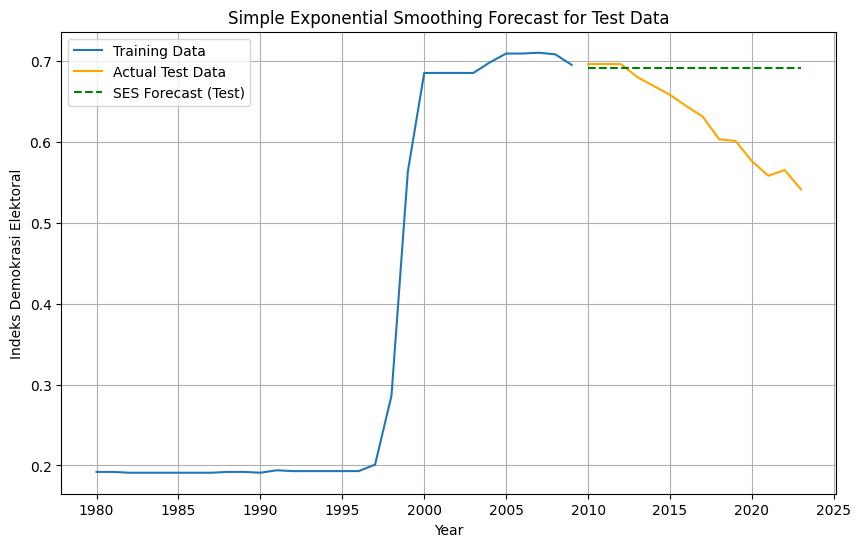

,v2x_polyarchy
year,
2010-01-01,0.69118
2011-01-01,0.69118
2012-01-01,0.69118
2013-01-01,0.69118
2014-01-01,0.69118
2015-01-01,0.69118
2016-01-01,0.69118
2017-01-01,0.69118
2018-01-01,0.69118


In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import matplotlib.pyplot as plt
import pandas as pd


data_indonesia = data_vdem[data_vdem['country_name'] == 'Indonesia']


data_indonesia['year'] = pd.to_datetime(data_indonesia['year'], format='%Y')
data_for_smoothing = data_indonesia.set_index('year')['v2x_polyarchy']


train_len = 30
train = data_for_smoothing[:train_len]
test = data_for_smoothing[train_len:]


model = SimpleExpSmoothing(train)
model_fit = model.fit(smoothing_level=0.3)


test_forecast = model_fit.forecast(steps=len(test))


test_forecast_df = pd.DataFrame({'year': test.index, 'v2x_polyarchy': test_forecast})
test_forecast_df.set_index('year', inplace=True)


full_forecast = pd.concat([data_for_smoothing, test_forecast_df])


plt.figure(figsize=(10, 6))
plt.plot(train.index, train.values, label='Training Data')
plt.plot(test.index, test.values, label='Actual Test Data', color='orange')
plt.plot(test_forecast_df.index, test_forecast_df['v2x_polyarchy'], label='SES Forecast (Test)', color='green', linestyle='dashed')
plt.title('Simple Exponential Smoothing Forecast for Test Data')
plt.xlabel('Year')
plt.ylabel('Indeks Demokrasi Elektoral')
plt.legend()
plt.grid()
plt.show()

test_forecast_df


In [ ]:
mae = mean_absolute_error(test, test_forecast)
rmse = mean_squared_error(test, test_forecast, squared=False)
mape = mean_absolute_percentage_error(test, test_forecast)

results = pd.DataFrame ({'Method': ['Simple Exponential Smoothing'],
                         'RMSE':[rmse], 'MAPE': [mape]})
results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Method,RMSE,MAPE
0,Simple Exponential Smoothing,0.081513,0.108949


##SIMPLE MOVING AVERAGE (SMA)

<ipython-input-57-f7796d7ab2fa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_indonesia['year'] = pd.to_datetime(data_indonesia['year'], format='%Y')
<ipython-input-57-f7796d7ab2fa>:22: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_years = pd.date_range(start=f"{data_for_smoothing.index.max().year+1}", periods=2, freq='Y')


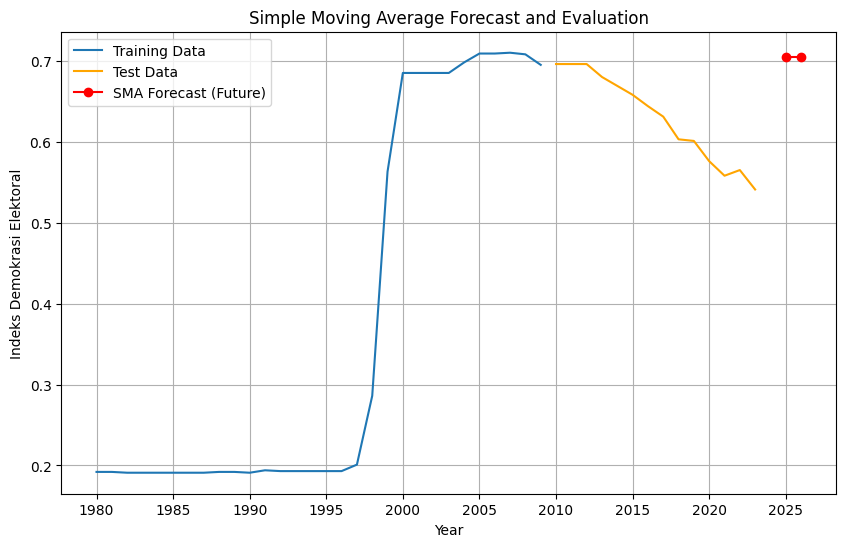

,v2x_polyarchy
year,
2024-12-31,0.704333
2025-12-31,0.704333


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data_indonesia = data_vdem[data_vdem['country_name'] == 'Indonesia']

data_indonesia['year'] = pd.to_datetime(data_indonesia['year'], format='%Y')

data_for_smoothing = data_indonesia.set_index('year')['v2x_polyarchy']

train_len = 30
train = data_for_smoothing[:train_len]
test = data_for_smoothing[train_len:]

window_size = 3

sma_train = train.rolling(window=window_size).mean()

last_sma_value = sma_train.dropna().iloc[-1]
test_forecast = [last_sma_value] * len(test)

future_forecast = [last_sma_value] * 2
forecast_years = pd.date_range(start=f"{data_for_smoothing.index.max().year+1}", periods=2, freq='Y')

future_forecast_df = pd.DataFrame({'year': forecast_years, 'v2x_polyarchy': future_forecast})
future_forecast_df.set_index('year', inplace=True)

full_data = pd.concat([data_for_smoothing, future_forecast_df])

plt.figure(figsize=(10, 6))
plt.plot(train.index, train.values, label='Training Data')
plt.plot(test.index, test.values, label='Test Data', color='orange')
plt.plot(future_forecast_df.index, future_forecast_df['v2x_polyarchy'], label='SMA Forecast (Future)', color='red', marker='o')
plt.title('Simple Moving Average Forecast and Evaluation')
plt.xlabel('Year')
plt.ylabel('Indeks Demokrasi Elektoral')
plt.legend()
plt.grid()
plt.show()

future_forecast_df


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import pandas as pd

rmse = mean_squared_error(test, test_forecast, squared=False)
mape = mean_absolute_percentage_error(test, test_forecast)

results = pd.DataFrame({
    'Method': ['Simple Moving Average (SMA)'],
    'RMSE': [rmse],
    'MAPE': [mape],
})

results


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Method,RMSE,MAPE
0,Simple Moving Average (SMA),0.091859,0.127028


##Holt's Exponential Smoothing

<ipython-input-59-31ff842d3645>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_indonesia['year'] = pd.to_datetime(data_indonesia['year'], format='%Y')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
<ipython-input-59-31ff842d3645>:18: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_years = pd.date_range(start=f"{last_year+1}", periods=2, freq='Y')


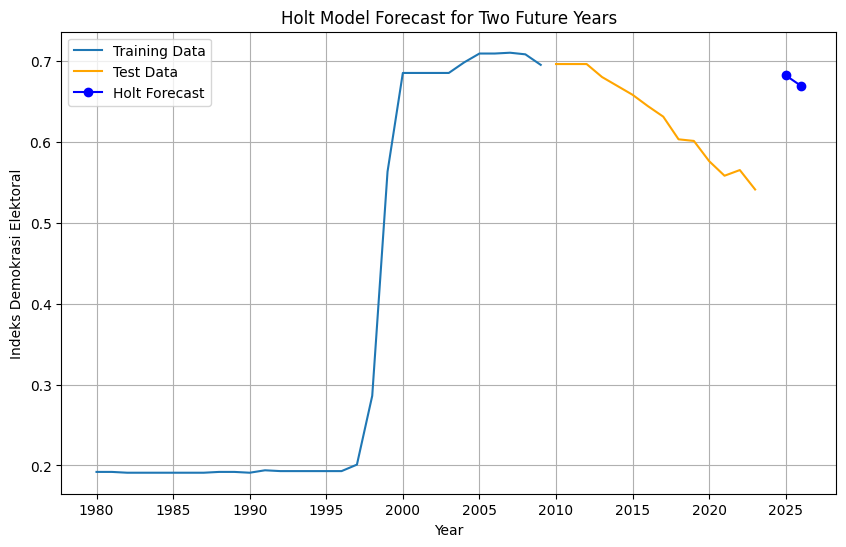

,v2x_polyarchy
year,
2024-12-31,0.682
2025-12-31,0.669


In [ ]:
from statsmodels.tsa.holtwinters import Holt
data_indonesia = data_vdem[data_vdem['country_name'] == 'Indonesia']

data_indonesia['year'] = pd.to_datetime(data_indonesia['year'], format='%Y')
data_for_smoothing = data_indonesia.set_index('year')['v2x_polyarchy']


train_len = 30
train = data_for_smoothing[:train_len]
test = data_for_smoothing[train_len:]


model = Holt(train)
model_fit = model.fit()
test_forecast = model_fit.forecast(steps=len(test))

last_year = data_for_smoothing.index.max().year
forecast_years = pd.date_range(start=f"{last_year+1}", periods=2, freq='Y')
forecast = model_fit.forecast(steps=2)


forecast_df = pd.DataFrame({'year': forecast_years, 'v2x_polyarchy': forecast})
forecast_df.set_index('year', inplace=True)


full_data = pd.concat([data_for_smoothing, forecast_df])


plt.figure(figsize=(10, 6))
plt.plot(train.index, train.values, label='Training Data')
plt.plot(test.index, test.values, label='Test Data', color='orange')
plt.plot(forecast_df.index, forecast_df['v2x_polyarchy'], label='Holt Forecast', color='blue', marker='o')
plt.title('Holt Model Forecast for Two Future Years')
plt.xlabel('Year')
plt.ylabel('Indeks Demokrasi Elektoral')
plt.legend()
plt.grid()
plt.show()


forecast_df

In [ ]:
import plotly.graph_objects as go
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt

data_indonesia = data_vdem[data_vdem['country_name'] == 'Indonesia']
data_indonesia['year'] = pd.to_datetime(data_indonesia['year'], format='%Y')


train = data_indonesia.iloc[:-int(len(data_indonesia) * 0.2)]
test = data_indonesia.iloc[-int(len(data_indonesia) * 0.2):]



model_holt = Holt(
    train['v2x_polyarchy'], initialization_method='estimated', damped_trend=True
).fit(optimized=True)



forecasts_holt = model_holt.forecast(steps=len(forecast_years))



forecast_holt_df = pd.DataFrame({
    'year': forecast_years,
    'v2x_polyarchy': forecasts_holt
})
last_year = train['year'].max()
forecast_years = pd.date_range(start=last_year + pd.DateOffset(years=1), periods=5, freq='Y')

def plot_func(forecast2: list[float],
              title: str) -> None:

              fig = go.Figure()
              fig.add_trace(go.Scatter(x=train['year'], y=train['v2x_polyarchy'], name='Train') )
              fig.add_trace(go.Scatter(x=test['year'], y=test['v2x_polyarchy'], name='Test'))
              fig.add_trace(go.Scatter(x=test['year'], y=forecast2, name='Holt'))
              fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
              width=650, title_x=0.5, height=400, xaxis_title='Date',
              yaxis_title='Indeks Demokrasi')

              return fig.show()


model_holt = Holt(train['v2x_polyarchy'], damped_trend=True).fit(optimized=True)
forecasts_holt = model_holt. forecast(len(test))

plot_func(forecasts_holt, "Holt's Exponential Smoothing")

<ipython-input-60-4f0cd835f2ee>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_indonesia['year'] = pd.to_datetime(data_indonesia['year'], format='%Y')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: Futu

In [ ]:

observed = train['v2x_polyarchy'][-5:].values
forecast_holt_values = forecasts_holt[:len(observed)]


mape_holt = mean_absolute_percentage_error(observed, forecast_holt_values)
rmse_holt = np.sqrt(mean_squared_error(observed, forecast_holt_values))

results = pd.DataFrame ({'Method': ['Holts Method'],
                         'RMSE':[mape_holt], 'MAPE': [rmse_holt]})
results

,Method,RMSE,MAPE
0,Holts Method,0.061752,0.042945


In [ ]:
model_holt.summary()

Dep. Variable:,v2x_polyarchy,No. Observations:,36
Model:,Holt,SSE,0.070
Optimized:,True,AIC,-214.648
Trend:,Additive,BIC,-206.730
Seasonal:,None,AICC,-210.648
Seasonal Periods:,None,Date:,"Wed, 18 Dec 2024"
Box-Cox:,False,Time:,17:58:41
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,1.0000000,beta,True


##Improvement Model Holt's Exponential Smoothing dengan Data Augmentation

In [ ]:
import numpy as np
import plotly.graph_objects as go
import pandas as pd
from statsmodels.tsa.holtwinters import Holt


data_indonesia = data_vdem[data_vdem['country_name'] == 'Indonesia']
data_indonesia['year'] = pd.to_datetime(data_indonesia['year'], format='%Y')


data_indonesia['year_num'] = data_indonesia['year'].dt.year  #
data_indonesia['is_election_year'] = data_indonesia['year_num'].apply(
    lambda x: 1 if x % 5 == 0 else 0)
data_indonesia['trend'] = np.arange(len(data_indonesia))
data_indonesia['rolling_mean'] = data_indonesia['v2x_polyarchy'].rolling(window=3, min_periods=1).mean()  # 3-year MA


train = data_indonesia.iloc[:-int(len(data_indonesia) * 0.2)]
test = data_indonesia.iloc[-int(len(data_indonesia) * 0.2):]


last_year = train['year'].max()
forecast_years = pd.date_range(start=last_year + pd.DateOffset(years=1), periods=5, freq='Y')


train_target = train['v2x_polyarchy']
model_holt = Holt(train_target, damped_trend=True).fit(optimized=True)


forecasts_holt = model_holt.forecast(len(test))


def plot_func(train, test, forecast, title):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train['year'], y=train['v2x_polyarchy'], name='Train'))
    fig.add_trace(go.Scatter(x=test['year'], y=test['v2x_polyarchy'], name='Test'))
    fig.add_trace(go.Scatter(x=test['year'], y=forecast, name="Forecast"))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Year',
                      yaxis_title='Indeks Demokrasi')
    fig.show()


plot_func(train, test, forecasts_holt, "Improved Holt's Exponential by Data Augmentation")


<ipython-input-294-5df987220b1d>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-294-5df987220b1d>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-294-5df987220b1d>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-294-5